## Activity 4: Line Graphs with the Object-Oriented API and Pandas DataFrames

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
df = pd.read_csv(url)
df.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1 ""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


In [2]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

Note: There's a typo in the book, the DataFrame being used is a Pandas Dataframe and not a Spark DataFrame

In [3]:
#3.	Now read the new dataset with column names and display it:
df = pd.read_csv(url, names= column_names, delim_whitespace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.loc[df.horsepower == '?', 'horsepower'] = np.nan
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['full_date'] = pd.to_datetime(df.year, format='%y')
df['year'] = df['full_date'].dt.year


In [5]:
df.dtypes

mpg                    float64
cylinders                int64
displacement           float64
horsepower             float64
weight                 float64
acceleration           float64
year                     int64
origin                   int64
name                    object
full_date       datetime64[ns]
dtype: object

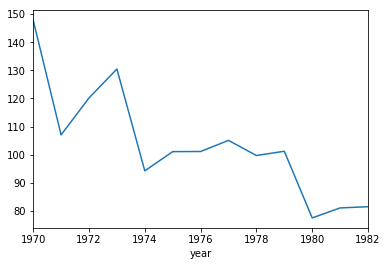

In [6]:
df.groupby('year')['horsepower'].mean().plot()